In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs
from configs import states_per_site

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(N_inp, N_bar, num_states, steps=200)

# Using place autocorrelation to define site distance

In [4]:
_, acts, _, _ = model.run_nonrecurrent(place_inputs)

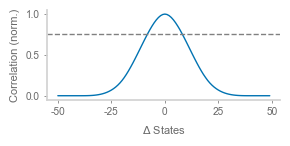

In [5]:
fig = plt.figure(figsize=(3, 1.5))
test_state = num_states//2
spatial_falloff = np.corrcoef(acts)[test_state]
spatial_falloff -= spatial_falloff.min()
spatial_falloff /= spatial_falloff.max()
plt.plot(spatial_falloff)
plt.axhline(0.75, color='gray', linestyle='--')
plt.xticks(
    [0, 25, 50, 75, 100],
    [-50, -25, 0, 25, 50])
plt.xlabel('$\Delta$ States')
plt.ylabel('Correlation (norm.)')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

In [6]:
site_distance = 50 - np.argwhere(spatial_falloff>=0.75)[0,0]
print(site_distance)

8


# Visit Activity

In [33]:
_, acts, _, acts_over_time = model.run_nonrecurrent(place_inputs)

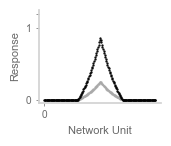

In [34]:
t = 99
n_pts = 200
sample_idxs = np.linspace(0, N_bar, n_pts, endpoint=False).astype(int)
plt.figure(figsize=(1.75, 1.5))
plt.scatter(
    np.arange(n_pts),
    acts_over_time[0, num_states//2][sample_idxs],
    color='darkgrey', s=0.4
    )
plt.scatter(
    np.arange(n_pts),
    acts_over_time[t, num_states//2][sample_idxs],
    color='black', s=0.4
    )
ax = plt.gca()
plt.xticks([0])
plt.xlabel('Network Unit')
plt.ylabel('Response')
plt.yticks([0, 1, 1.2], ['0', '1', ''])
plt.ylim(top=1.25)
plt.tight_layout()
plt.savefig('figures/fig2c.svg', dpi=300, transparent=True)
plt.show()

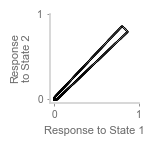

In [42]:
plt.figure(figsize=(1.555, 1.5))
plt.scatter(
    acts_over_time[-1, num_states//2],
    acts_over_time[-1, num_states//2+1],
    s=.01, color='black'
    )
plt.yticks([0, 1])
plt.xticks([0, 1])
plt.xlabel('Response to State 1')
plt.ylabel('Response\nto State 2')
plt.tight_layout()
ax = plt.gca()
plt.savefig('figures/fig2e.svg', dpi=300, transparent=True)
plt.show()

# Barcode Activity

In [27]:
np.random.seed(1)
model = Model(N_inp, N_bar, num_states, steps=200)

In [28]:
_, acts, _, acts_over_time = model.run_recurrent(place_inputs)

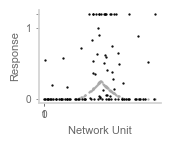

In [32]:
t = 99
n_zero_pts = 50
n_nonzero_pts = 50
sample_t0 = acts_over_time[0, num_states//2]
sample_t = acts_over_time[t, num_states//2]

sample_t0[sample_t0>1] = 1.2
sample_t[sample_t>1] = 1.2

# Random Sampling
eps = 1E-3
zero_pts = np.argwhere(sample_t < eps)[:,0]
nonzero_pts = np.argwhere(sample_t >= eps)[:,0]
np.random.shuffle(zero_pts)
np.random.shuffle(nonzero_pts)
zero_pts = zero_pts[:n_zero_pts]
nonzero_pts = nonzero_pts[:n_nonzero_pts]
sampled_idxs = np.zeros(N_bar).astype(bool)
sampled_idxs[zero_pts] = True
sampled_idxs[nonzero_pts] = True
sampled_idxs = np.argwhere(sampled_idxs)[:,0]


fig, ax = plt.subplots(figsize=(1.75, 1.5))
plt.scatter(
    sampled_idxs, sample_t0[sampled_idxs],
    color='darkgrey', s=0.4
    )
plt.scatter(
    sampled_idxs, sample_t[sampled_idxs],
    color='black', s=0.4
    )

ax.get_xaxis().set_ticks([])
plt.xlabel('Network Unit')
plt.ylabel('Response')
plt.xticks([0, 1])
plt.yticks([0, 1, 1.2], ['0', '1', ''])
plt.ylim(top=1.25)
plt.tight_layout()
plt.savefig('figures/fig2d.svg', dpi=300, transparent=True)
plt.show()

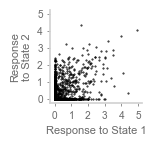

In [60]:
plt.figure(figsize=(1.555, 1.5))
plt.scatter(
    acts_over_time[-1, num_states//2],
    acts_over_time[-1, num_states//2+1],
    s=.2, color='black'
    )
plt.yticks([0, 1, 2, 3, 4, 5])
plt.xticks([0, 1, 2, 3, 4, 5])
plt.xlabel('Response to State 1')
plt.ylabel('Response\nto State 2')
xlims = ax.get_xlim()
ylims = ax.get_ylim()
min_lim = min(xlims[0], ylims[0])
max_lim = max(xlims[1], ylims[1])
plt.xlim(min_lim, max_lim)
plt.ylim(min_lim, max_lim)
plt.tight_layout()
plt.savefig('figures/fig2f.svg', dpi=300, transparent=True)
plt.show()

# SFig 1

In [6]:
_, acts, _, acts_over_time = model.run_recurrent(place_inputs)

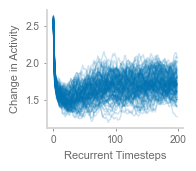

In [61]:
plt.figure(figsize=(2,1.75))
for s in range(100):
    diffs = []
    prev_act = acts_over_time[0, s]
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - prev_act))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change in Activity')
plt.tight_layout()
plt.savefig('figures/figS2a.svg', dpi=300, transparent=True)
plt.show()

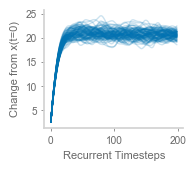

In [62]:
plt.figure(figsize=(2,1.75))
for s in range(100):
    diffs = []
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - acts_over_time[0, s]))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change from x(t=0)')
plt.tight_layout()
plt.savefig('figures/figS2b.svg', dpi=300, transparent=True)
plt.show()

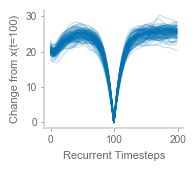

In [69]:
plt.figure(figsize=(2,1.75), facecolor="w")
for s in range(100):
    diffs = []
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - acts_over_time[100, s]))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change from x(t=100)')
plt.tight_layout()
#plt.savefig('figures/figS2b.svg', dpi=300, transparent=True)
plt.show()

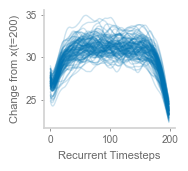

In [70]:
plt.figure(figsize=(2,1.75), facecolor="w")
for s in range(100):
    diffs = []
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - acts_over_time[-1, s]))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change from x(t=200)')
plt.tight_layout()
#plt.savefig('figures/figS2b.svg', dpi=300, transparent=True)
plt.show()